In [1]:
# depends on create_building_gaze IR Notebook
library(jsonlite)
library(tidyverse)
library(tidyheatmaps)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(showtext)
font_add_google("Lato", "lato")
showtext_auto()

Loading required package: sysfonts

Loading required package: showtextdb



In [28]:
source("get_buildings.R")

In [3]:
building_data_tibble <- readRDS(file = "building_data.Rds")

In [8]:
pars_building_data <- building_data_tibble %>%
    group_by(pid) %>% group_split()

cur_par_building_data <- pars_building_data[[1]]


In [47]:
adj_data_tibble <- pars_building_data %>% map(function(building_data) {
        adj_list_building <- get_adj_list(building_data)
        pid <- cur_par_building_data[1,]$pid
        group <- cur_par_building_data[1,]$group

        start_buildings <- names(adj_list_building)
        adj_tibble <- start_buildings %>% map(function(n1) {
            cur_list <- adj_list_building[[n1]]
            edge_buildings <- names(cur_list)
            tibble_cur_list <- edge_buildings %>% map(function(n2) {
                tibble(
                    pid = pid,
                    group = group,
                    b1 = n1,
                    b2 = n2,
                    count = adj_list_building[[n1]][[n2]]
                )
            })
            rlang::exec(bind_rows, !!!tibble_cur_list)
        })
        rlang::exec(bind_rows, !!!adj_tibble)
    }) %>% rlang::exec(bind_rows, !!!.)

In [50]:
nrow(adj_data_tibble)
saveRDS(adj_data_tibble, "adj_data.Rds")

[1] 6503

In [51]:
library(repr)
# Change plot size to 8 x 3
options(repr.plot.width=45, repr.plot.height=25)

`summarise()` has grouped output by 'b1'. You can override using the `.groups` argument.


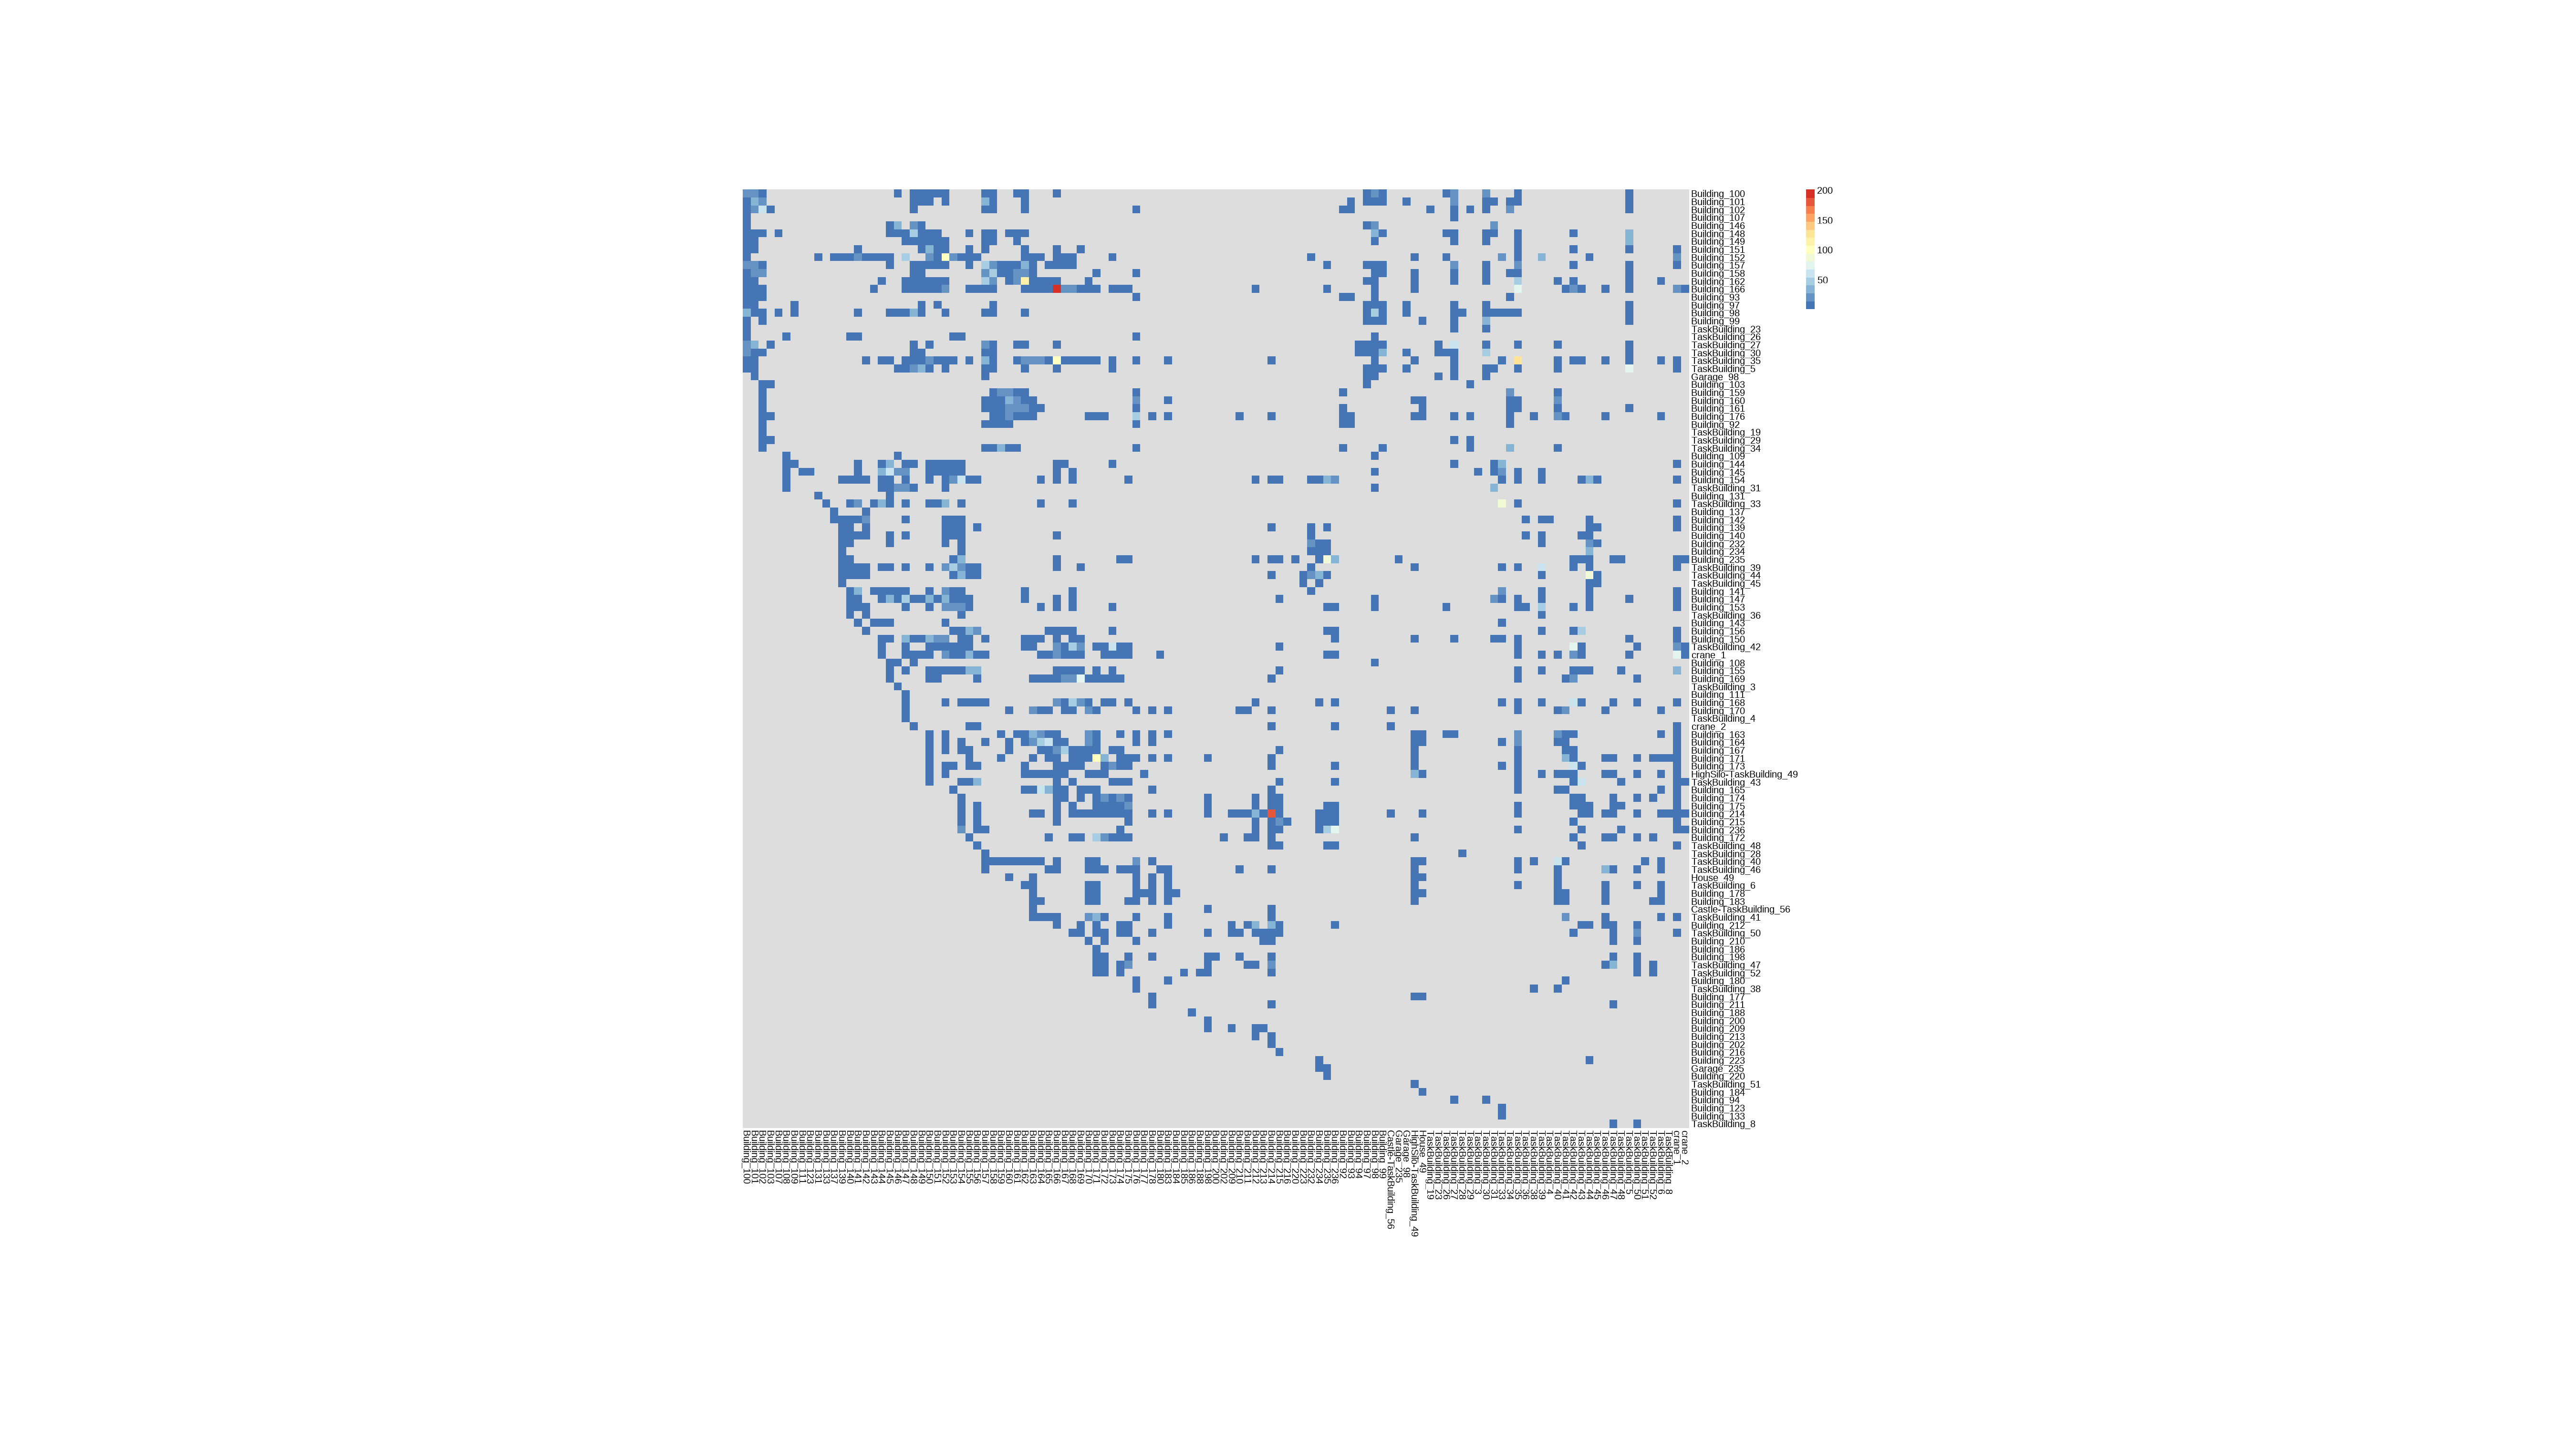

In [61]:
# duration sum for each building for each participant
adj_data_tibble %>%
    filter(b1 != "noData" & b1 != "newSession") %>%
    filter(b2 != "noData" & b2 != "newSession") %>%
    group_by(b1, b2) %>%
    summarise(sum_count = sum(count)) %>%
    arrange(b1, b2) %>%
    ungroup() %>%
    tidyheatmap(
        row = b2,
        column = b1,
        values = sum_count, 
        annotation_names_row = FALSE,
        cellwidth = 10,
        cellheight = 10,
        fontsize = 15
    )

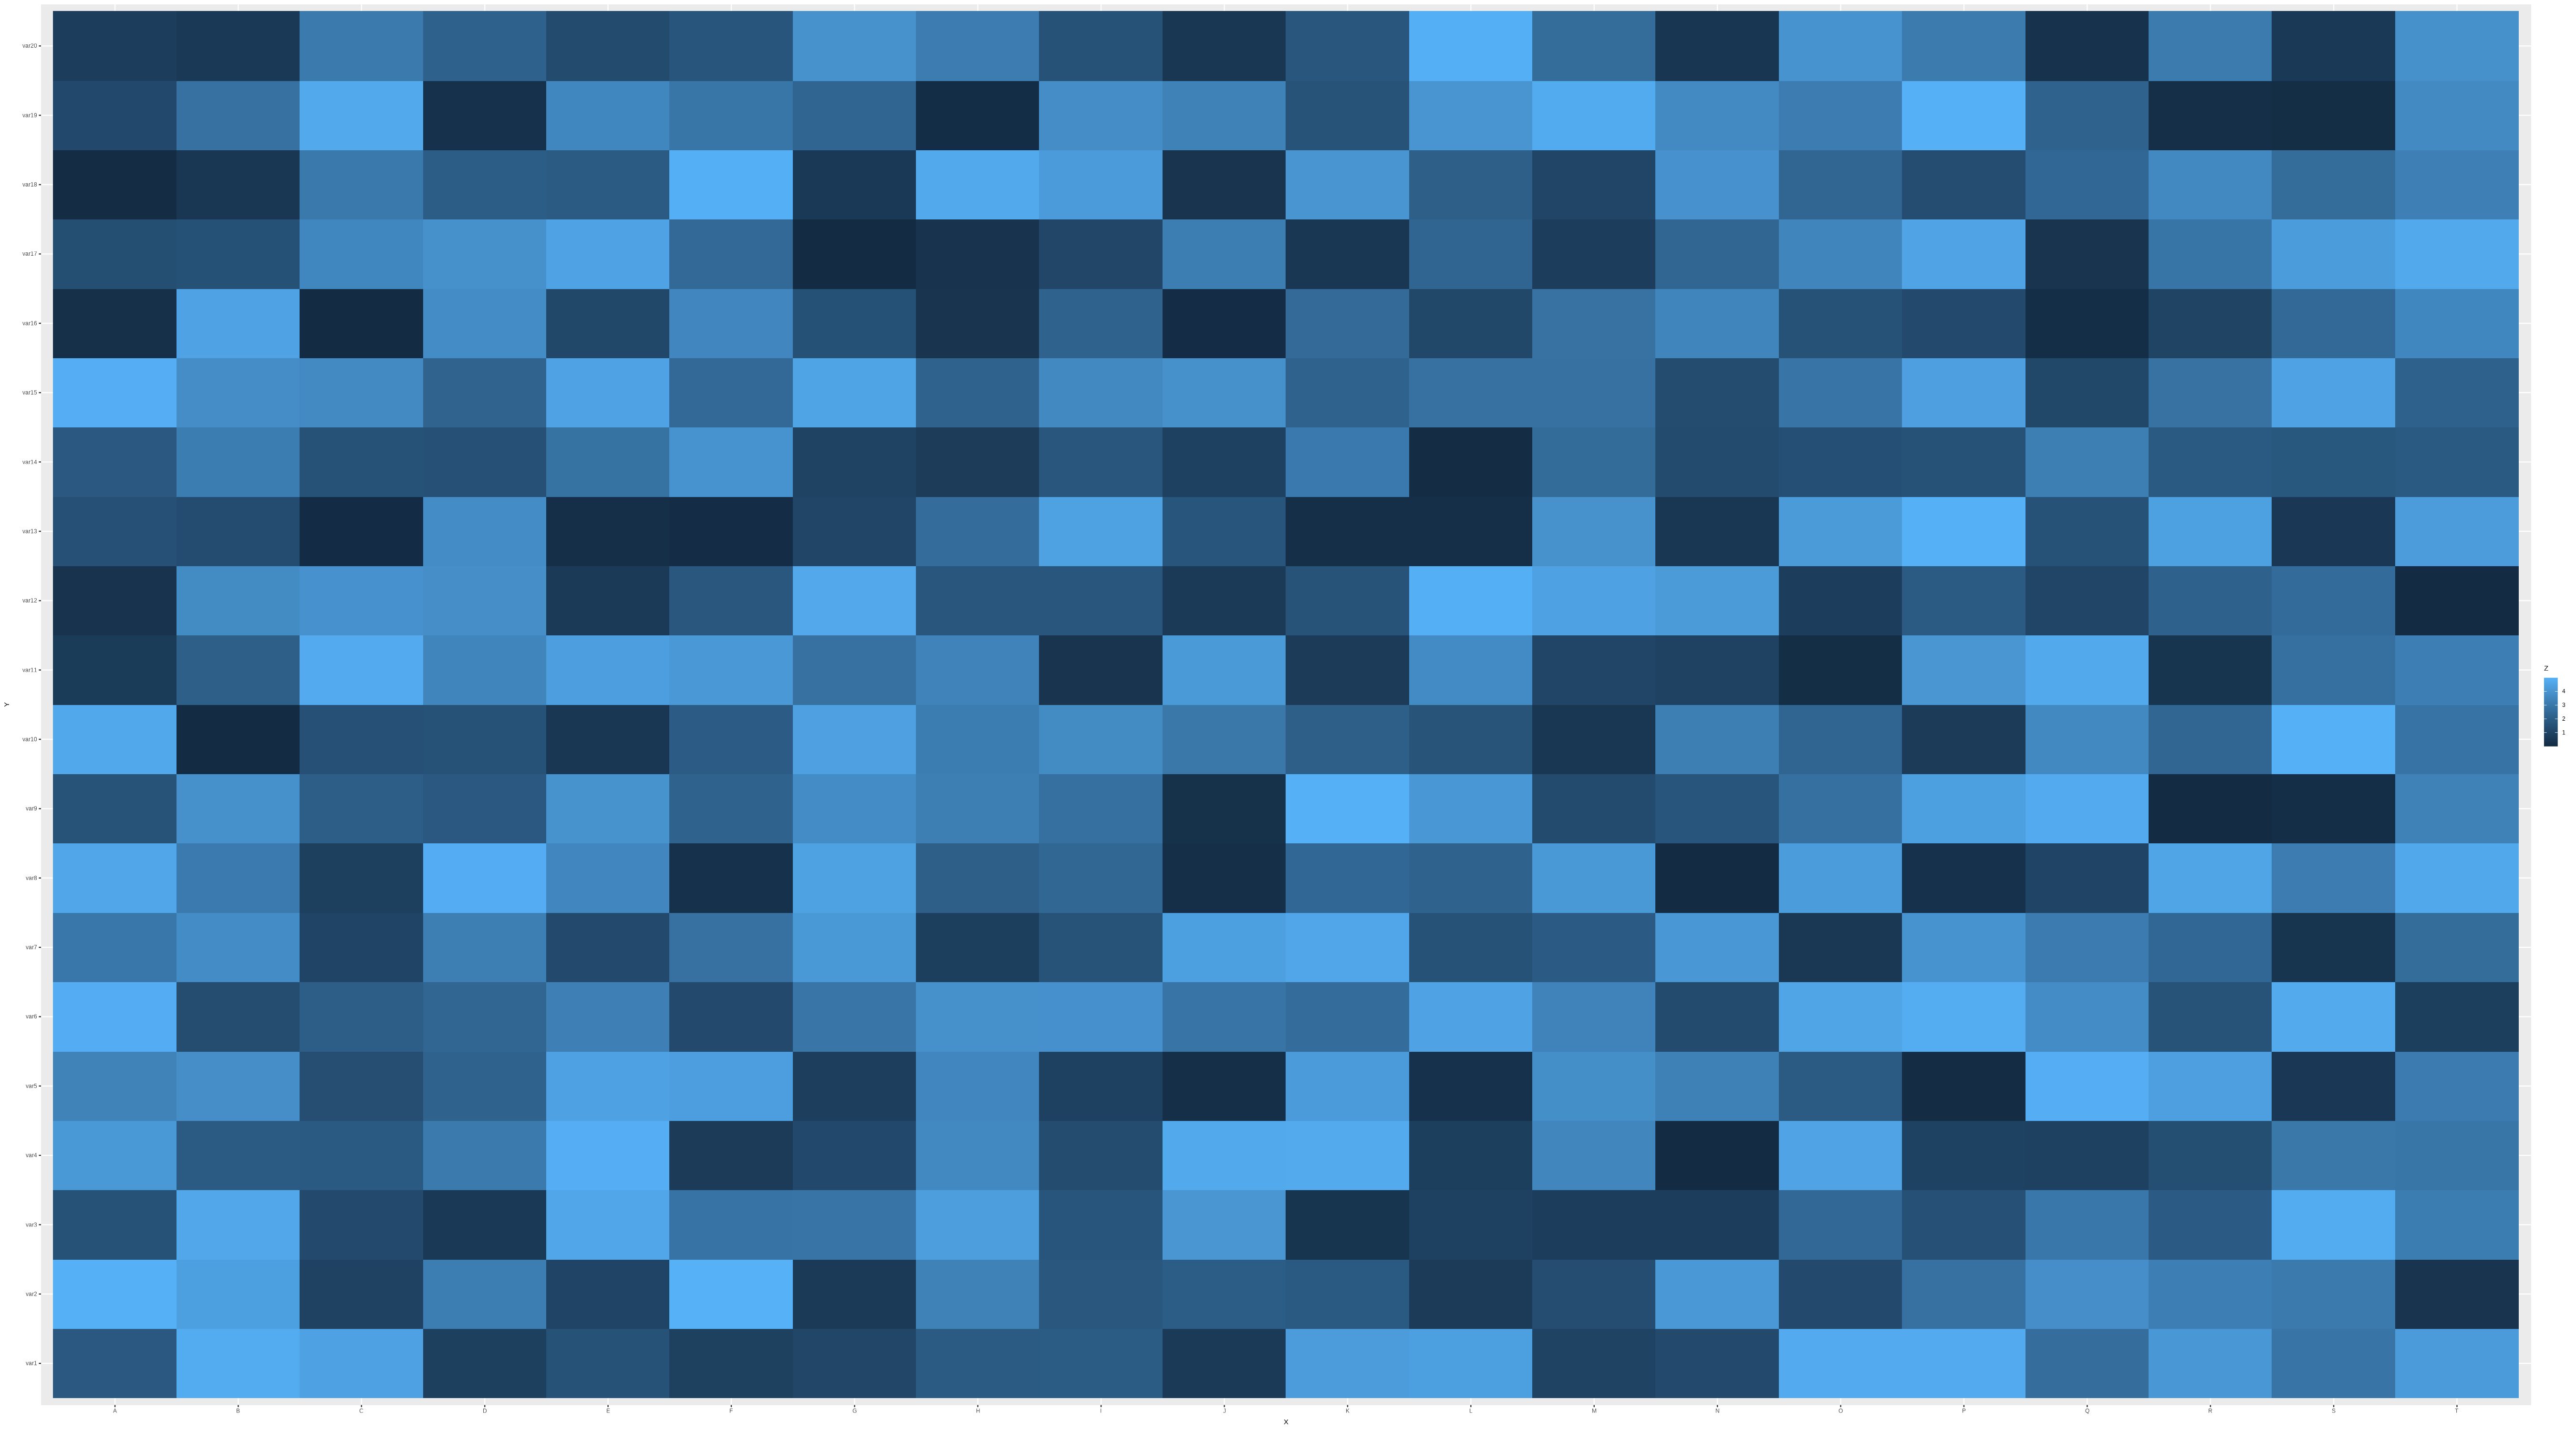

In [62]:

# Dummy data
x <- LETTERS[1:20]
y <- paste0("var", seq(1,20))
data <- expand.grid(X=x, Y=y)
data$Z <- runif(400, 0, 5)
 
# Heatmap 
ggplot(data, aes(X, Y, fill= Z)) + 
  geom_tile() +
    theme